# 数据准备

In [1]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import tensorflow.examples.tutorials.mnist.input_data as input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
Please use alternatives such as: tensorflow_datasets.load('mnist')
Instructions for updating:
Please write your own downloading logic.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/_DataSet.

In [2]:
print('train images     :', mnist.train.images.shape,
      'labels:'           , mnist.train.labels.shape)
print('validation images:', mnist.validation.images.shape,
      ' labels:'          , mnist.validation.labels.shape)
print('test images      :', mnist.test.images.shape,
      'labels:'           , mnist.test.labels.shape)

train images     : (55000, 784) labels: (55000, 10)
validation images: (5000, 784)  labels: (5000, 10)
test images      : (10000, 784) labels: (10000, 10)


# 建立模型

In [3]:
def layer(output_dim,input_dim,inputs, activation=None):
    W = tf.Variable(tf.random_normal([input_dim, output_dim]))
    b = tf.Variable(tf.random_normal([1, output_dim]))
    XWb = tf.matmul(inputs, W) + b
    if activation is None:
        outputs = XWb
    else:
        outputs = activation(XWb)
    return outputs

In [4]:
# 输入层
x = tf.placeholder("float", [None, 784])

In [5]:
# 隐藏层
h1=layer(output_dim=256,input_dim=784,
         inputs=x ,activation=tf.nn.relu)  

In [6]:
# 输出层
y_predict=layer(output_dim=10,input_dim=256,
                    inputs=h1,activation=None)


# 定义训练方式

In [7]:
y_label = tf.placeholder("float", [None, 10])

In [8]:
# 损失函数
loss_function = tf.reduce_mean(
                  tf.nn.softmax_cross_entropy_with_logits
                         (logits=y_predict , 
                          labels=y_label))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [9]:
# 优化器
optimizer = tf.train.AdamOptimizer(learning_rate=0.001) \
                    .minimize(loss_function)

# 定义评估模型的准确率

In [10]:
# 正确率
correct_prediction = tf.equal(tf.argmax(y_label  , 1),
                              tf.argmax(y_predict, 1))

In [11]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

# 开始训练

In [12]:
trainEpochs = 15
batchSize = 100
totalBatchs = int(mnist.train.num_examples/batchSize)
epoch_list=[];loss_list=[];accuracy_list=[]
from time import time
startTime=time()
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [13]:
for epoch in range(trainEpochs):
    for i in range(totalBatchs):
        batch_x, batch_y = mnist.train.next_batch(batchSize)
        sess.run(optimizer,feed_dict={x: batch_x,y_label: batch_y})
        
    loss,acc = sess.run([loss_function,accuracy],
                        feed_dict={x: mnist.validation.images, 
                                   y_label: mnist.validation.labels})

    epoch_list.append(epoch);loss_list.append(loss)
    accuracy_list.append(acc)    
    print("Train Epoch:", '%02d' % (epoch+1), "Loss=", \
                "{:.9f}".format(loss)," Accuracy=",acc)
    
duration =time()-startTime
print("Train Finished takes:",duration)      

Train Epoch: 01 Loss= 6.341577530  Accuracy= 0.8396
Train Epoch: 02 Loss= 4.139776707  Accuracy= 0.8836
Train Epoch: 03 Loss= 3.191833973  Accuracy= 0.9042
Train Epoch: 04 Loss= 2.658230066  Accuracy= 0.9158
Train Epoch: 05 Loss= 2.267035961  Accuracy= 0.9248
Train Epoch: 06 Loss= 2.091619968  Accuracy= 0.927
Train Epoch: 07 Loss= 1.842520356  Accuracy= 0.9372
Train Epoch: 08 Loss= 1.676838636  Accuracy= 0.938
Train Epoch: 09 Loss= 1.588182569  Accuracy= 0.939
Train Epoch: 10 Loss= 1.559003711  Accuracy= 0.9414
Train Epoch: 11 Loss= 1.437926173  Accuracy= 0.9404
Train Epoch: 12 Loss= 1.399219632  Accuracy= 0.9432
Train Epoch: 13 Loss= 1.394408941  Accuracy= 0.9398
Train Epoch: 14 Loss= 1.279585004  Accuracy= 0.9468
Train Epoch: 15 Loss= 1.246885896  Accuracy= 0.9464
Train Finished takes: 27.640713691711426


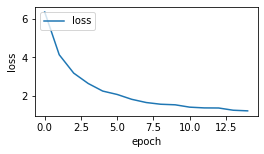

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.plot(epoch_list, loss_list, label = 'loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')

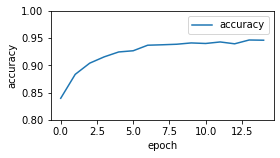

In [15]:
plt.plot(epoch_list, accuracy_list,label="accuracy" )
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.ylim(0.8,1)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

# 评估模型准确率

In [16]:
print("Accuracy:", sess.run(accuracy,
                           feed_dict={x: mnist.test.images,
                                      y_label: mnist.test.labels}))

Accuracy: 0.941


# 进行预测

In [17]:
prediction_result=sess.run(tf.argmax(y_predict,1),
                           feed_dict={x: mnist.test.images })

In [18]:
prediction_result[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=int64)

In [19]:
import matplotlib.pyplot as plt
import numpy as np
def plot_images_labels_prediction(images,labels,
                                  prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        
        ax.imshow(np.reshape(images[idx],(28, 28)), 
                  cmap='binary')
            
        title= "label=" +str(np.argmax(labels[idx]))
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

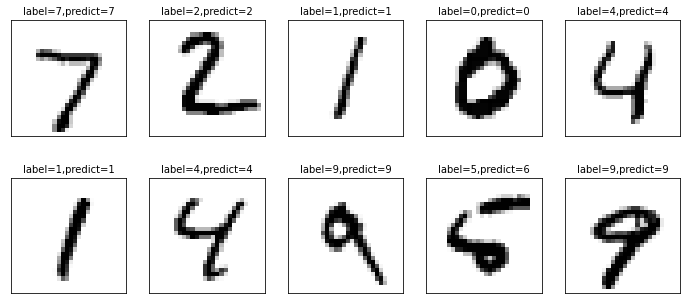

In [20]:
plot_images_labels_prediction(mnist.test.images,
                              mnist.test.labels,
                              prediction_result,0)

In [21]:
y_predict_Onehot=sess.run(y_predict,
                          feed_dict={x: mnist.test.images })

In [22]:
y_predict_Onehot[8]

array([-18.693539 ,   1.1766019,  22.063658 , -65.020935 ,  29.727703 ,
        30.330853 , 124.9814   , -94.04096  , -36.222614 ,   9.410989 ],
      dtype=float32)

# 找出预测错误

In [23]:
for i in range(400):
    if prediction_result[i]!=np.argmax(mnist.test.labels[i]):
        print("i="+str(i)+
              "   label=",np.argmax(mnist.test.labels[i]),
              "predict=",prediction_result[i])

i=8   label= 5 predict= 6
i=38   label= 2 predict= 3
i=62   label= 9 predict= 5
i=63   label= 3 predict= 2
i=100   label= 6 predict= 2
i=149   label= 2 predict= 9
i=193   label= 9 predict= 2
i=211   label= 5 predict= 8
i=234   label= 7 predict= 9
i=241   label= 9 predict= 3
i=245   label= 3 predict= 1
i=247   label= 4 predict= 6
i=259   label= 6 predict= 0
i=268   label= 8 predict= 5
i=274   label= 9 predict= 3
i=289   label= 5 predict= 8
i=320   label= 9 predict= 7
i=321   label= 2 predict= 7
i=324   label= 0 predict= 6
i=340   label= 5 predict= 3
i=352   label= 5 predict= 3
i=362   label= 2 predict= 7
i=381   label= 3 predict= 2


In [24]:
sess.close()